In [1]:
#all imports
from sklearn.utils import shuffle

from functions_utils import compounds
from functions_utils import file_splitter
from functions_utils import load_output

from regression_function import regression_alpha
from regression_function import regression_test


import os
import numpy as np

import matplotlib.pyplot as plt


In [2]:
'''!!!TO RUN ONLY ONCE!!! when there is no files in splitted_data''' 
# file_splitter("xyz_files/c6h6.xyz","splitted_data")

y=load_output("xyz_files/energies_benzene.xyz")
y=np.array(y)
# y=[float(i) for i in y]

x= np.array([mol.representation for mol in compounds("splitted_data")])

In [3]:
#Assigning last 1000 data as testing data
x_test=x[-1000:]
y_test=y[-1000:]

#converting the energies as float(initially were on string)
y_test_float=y_test.astype(np.float64)

In [4]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000,8000,9000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x[:i]
    y_train=y[:i]
    #shuffling the training data
    x_shuffle,y_shuffle=shuffle(x_train,y_train)
    y_train_float=y_shuffle.astype(np.float64)
    alpha=regression_alpha(x_shuffle,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_shuffle,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)
print("Minimum is",min(mae_lst))
print("Maximum is",max(mae_lst))

[1.2471788495113822, 0.6942586084471093, 0.48368414125887044, 0.38646400885615967, 0.28944010371531714, 0.26373296250720024, 0.16811210292300904, 0.14442449842427585, 0.11178554087691542, 0.09204390662003689, 0.0788459412078095, 0.06258095177788146, 0.050588370511722845, 0.03785029155038825, 0.03395334334173015]
Minimum is 0.03395334334173015
Maximum is 1.2471788495113822


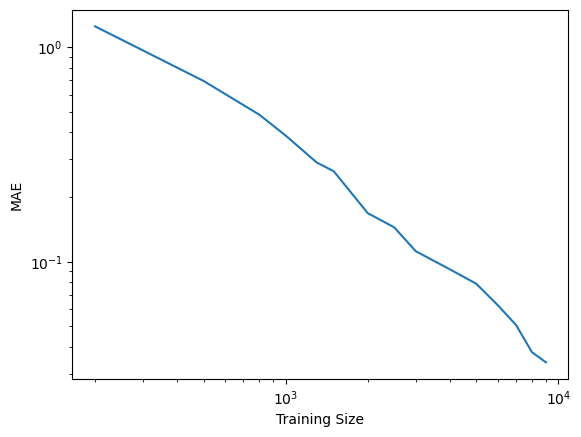

In [5]:
#plotting using matplotlib
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.show()
